<h1 style="color:Green;"> DC Public Employee Salary Analysis</h1>

<h1 style="color:DarkBlue;">Introduction</h1>

<p style="color:#34495E; font-size:16px;">
This project analyzes the <b>DC Public Employee Salary Dataset</b> obtained from <b>Data.gov (United States Government)</b>.  
The dataset contains information about government employees in Washington, DC, including their job titles, departments, agencies, and annual salaries.  

The purpose of this project is to explore salary distributions, departmental trends, and other factors that influence compensation patterns in public employment.  
Through data preprocessing and exploratory data analysis, we aim to extract meaningful insights that can be useful for HR analytics, payroll planning, and government transparency.
</p>

<hr style="border:1px solid #1ABC9C;">


<h1 style="color:DarkBlue;">Attribute Information</h1>
<p style="color:#34495E; font-size:16px;">
This dataset has <b>Rows=84268</b> and <b>Columns=9</b>
</p>



| Column Name | Description |
|--------------|-------------|
| **FIRST_NAME** | Employee’s first name |
| **LAST_NAME** | Employee’s last name |
| **JOBTITLE** | Employee’s official job title |
| **DESCRSHORT** | Department or division (short description of the agency) |
| **GRADE** | Job grade or level |
| **COMPRATE** | Annual compensation rate (salary) of the employee |
| **HIREDATE_STRING** | Date when the employee was first hired |
| **GVT_TYPE_OF_APPT** | Type of government appointment (e.g., Regular, Temporary) |
| **OBJECTID** | Unique identifier for each record |

<p style="color:#34495E; font-size:16px;">
This dataset provides detailed information about the DC government workforce, including employee job titles, departments, and compensation.  
It is useful for salary analysis, workforce distribution studies, and understanding public sector hiring patterns.
</p>


<h1 style="color:DarkBlue;">Import Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<p>
<b>pandas</b>

pandas is a powerful Python library used for data manipulation, cleaning, and analysis.
It provides flexible data structures like DataFrame and Series, making it easy to handle tabular data, perform filtering, grouping, merging, and time-series operations.

<b>numpy</b>

NumPy (Numerical Python) is used for fast mathematical and numerical operations.
It provides support for multi-dimensional arrays, linear algebra, statistical functions, and serves as the foundation for many data-science libraries like pandas and scikit-learn.

<b>matplotlib.pyplot</b>

Matplotlib (pyplot) is the fundamental Python library used for creating static visualizations such as line charts, bar charts, histograms, scatter plots, etc.
It gives full control over figure styling, labeling, and layout customization.

<b>seaborn</b>

Seaborn is a statistical visualization library built on top of Matplotlib.
It provides beautiful, modern, and easy-to-use chart styles. Ideal for visualizing distributions, correlations, heatmaps, and trends with less code and better aesthetics.
</p>

<h1 style="color:DarkBlue;">Import dataset</h1>

<p style="color:DarkBlue;">
In this step, we load our dataset (<b>DC Public Employee Salary Dataset</b>) into Python using the <b>Pandas</b> library.  
The dataset file is stored in CSV (Comma-Separated Values) format, which is one of the most common formats used for data analysis.
</p>

In [2]:
#Load the Dataset
file_path="DC_Public_Employee_Salary.csv"
df=pd.read_csv(file_path)

# Display basic information
print("Dataset Load Successfully !\n")

#Shows total rows and columns
print("Shape of Dataset:",df.shape) 

# Display first 5 rows
df.head()

Dataset Load Successfully !

Shape of Dataset: (84268, 9)


,FIRST_NAME,LAST_NAME,JOBTITLE,DESCRSHORT,GRADE,COMPRATE,HIREDATE_STRING,GVT_TYPE_OF_APPT,OBJECTID
0,Scott,Pitzer,Facilities Systems Specialist,DBH,12,90805.0,1987/10/01,CS - Reg,1
1,Pauline,Oboite,NURSE,DBH,05,76510.0,2000/02/14,CS - Reg,2
2,Dawn,Fong,Special Projects Coordinator,DCG,12,90805.0,2020/03/16,CS - Term,3
3,Sonya,Kingsland,Behavioral Health Technician,DBH,08,70600.0,1988/06/07,CS - Reg,4
4,Octavia,Fletcher,Behavioral Health Technician,DBH,08,70600.0,1995/09/18,CS - Reg,5


<h1 style="color:DarkBlue;">Exploratory Data Analysis (EDA)</h1>

<p style="color:#34495E; font-size:16px;">
In this section, we will explore the dataset to understand its structure, data types, and summary statistics.  
This helps in identifying data quality issues such as missing values, outliers, and inconsistencies before further analysis.
</p>

<h2 style="color:Green;">Step 1: Understanding the Dataset Structure using df.info()</h2>

<p style="color:DarkBlue;">
The <b>df.info()</b> function provides a concise summary of the dataset,  
including the number of rows, columns, data types, non-null values, and memory usage.  
This helps in understanding the structure of the dataset before applying any data preprocessing or transformations.
</p>

In [4]:
# View dataset info
# Gives structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84268 entries, 0 to 84267
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST_NAME        84268 non-null  object 
 1   LAST_NAME         84268 non-null  object 
 2   JOBTITLE          84268 non-null  object 
 3   DESCRSHORT        84268 non-null  object 
 4   GRADE             84159 non-null  object 
 5   COMPRATE          84268 non-null  float64
 6   HIREDATE_STRING   84268 non-null  object 
 7   GVT_TYPE_OF_APPT  84268 non-null  object 
 8   OBJECTID          84268 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 5.8+ MB


<h2 style="color:Green;">Step 2:Descriptive Statistics using df.describe()</h2>

<p style="color:DarkBlue;">
To understand the overall structure and distribution of the dataset,  
we use the <b>df.describe()</b> function. This function provides a statistical summary of all numeric columns,  
such as the mean, standard deviation, minimum, maximum, and percentile values.
</p>

In [5]:
df.describe()

,COMPRATE,OBJECTID
count,84268.000000,84268.000000
mean,83093.846473,42134.500000
std,44008.642749,24326.220579
min,0.000000,1.000000
25%,63024.000000,21067.750000
50%,86727.000000,42134.500000
75%,112310.500000,63201.250000
max,390232.000000,84268.000000


<h2 style="color:Green;">Step 3: Checking for Missing Values</h2>

<p style="color:DarkBlue;">
Before performing any kind of data analysis, it is essential to check whether the dataset contains missing (null) values.  
Missing values can affect calculations, visualizations, and overall accuracy of insights.  
The <b>isnull()</b> function in Pandas helps identify missing values,  
and the <b>sum()</b> function counts how many null values are present in each column.
</p>

In [6]:
df.isnull().sum()

FIRST_NAME            0
LAST_NAME             0
JOBTITLE              0
DESCRSHORT            0
GRADE               109
COMPRATE              0
HIREDATE_STRING       0
GVT_TYPE_OF_APPT      0
OBJECTID              0
dtype: int64

<h2 style="color:Green;">Step 4 Finding the Number of Unique Values</h2>

<p style="color:DarkBlue;">
The <b>nunique()</b> function in Pandas is used to find the number of unique or distinct values in each column of the dataset.  
It helps us understand the variety of data present — for example, how many unique job titles, departments, or grades exist.
</p>

In [7]:
# Check unique values per column
df.nunique()

FIRST_NAME          14185
LAST_NAME           16486
JOBTITLE             3978
DESCRSHORT             98
GRADE                  72
COMPRATE             6190
HIREDATE_STRING      5269
GVT_TYPE_OF_APPT       19
OBJECTID            84268
dtype: int64

<h2 style="color:Green;">Step 5: Checking Data Types of Each Column</h2>

<p style="color:DarkBlue;">
The <b>dtypes</b> attribute in Pandas is used to identify the data type of each column in the dataset.  
Different columns can have different data types such as numeric, string, or datetime.  
Understanding data types is essential before performing operations like mathematical calculations or visualizations.
</p>

In [8]:
# Check column data types
df.dtypes

# Count numeric and object (string) columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
string_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", len(numeric_cols))
print(list(numeric_cols))
print("\nString columns:", len(string_cols))
print(list(string_cols))

Numeric columns: 2
['COMPRATE', 'OBJECTID']

String columns: 7
['FIRST_NAME', 'LAST_NAME', 'JOBTITLE', 'DESCRSHORT', 'GRADE', 'HIREDATE_STRING', 'GVT_TYPE_OF_APPT']


<h1 style="color:DarkBlue;">Pre_Processing</h1>
<h2 style="color:Green;">1.Handle Missing Values</h2>

<h3 style="color:Black;">Checking Missing Values</h3>

<p style="color:DarkBlue;">
Before performing any data analysis, it is important to check if the dataset contains missing or null values.  
Missing values can affect calculations, visualizations, and model accuracy.  
We use the <b>isnull()</b> and <b>sum()</b> functions in Pandas to count how many missing values each column contains.
</p>

In [9]:
df.isnull().sum()

FIRST_NAME            0
LAST_NAME             0
JOBTITLE              0
DESCRSHORT            0
GRADE               109
COMPRATE              0
HIREDATE_STRING       0
GVT_TYPE_OF_APPT      0
OBJECTID              0
dtype: int64

In [10]:
# Find columns that have missing values
missing_values = df.isnull().sum()

# Filter only columns with missing values
missing_columns = missing_values[missing_values > 0]

# Display results
print("Columns with Missing Values:\n")
print(missing_columns)

Columns with Missing Values:

GRADE    109
dtype: int64


In [11]:
df[df['GRADE'].isnull()]['JOBTITLE'].value_counts().head(10)

JOBTITLE
Teacher, Special Ed.              9
Election Worker                   6
Recreation Specialist(Seasonal    5
Aide, 10mo Pre-K/K                4
Teacher, General Elementary       3
YOUTH DEVELOPMENT REPRESENTATI    3
Investigator                      3
Coach, Instructional              2
Aide (Afterschool)                2
ADJUNCT PROFESSOR                 2
Name: count, dtype: int64

<h2 style="color:Green;">Step 2: Handling Duplicate Records</h2>

<p style="color:DarkBlue;">
Duplicate data entries can occur when the same employee or record appears multiple times in the dataset.  
These duplicates can affect data accuracy, bias statistical results, and distort visualization outputs.  
Hence, it's important to identify and remove duplicate rows before analysis.
</p>

In [12]:
# Step 1: Check total duplicate rows
df.duplicated().sum()

# Step 2: View duplicate rows (optional)
df[df.duplicated()]

# Step 3: Remove duplicates
df = df.drop_duplicates()

# Step 4: Confirm removal
df.duplicated().sum()

np.int64(0)

In [13]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:",duplicate_rows.shape[0])
duplicate_rows.head()

Number of duplicate rows: 0


,FIRST_NAME,LAST_NAME,JOBTITLE,DESCRSHORT,GRADE,COMPRATE,HIREDATE_STRING,GVT_TYPE_OF_APPT,OBJECTID


In [14]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Verify duplicates are removed
print("Number of rows after removing duplicates:",df_cleaned.shape[0])

Number of rows after removing duplicates: 84268


In [15]:
# Remove duplicates based on specific columns.
df_cleaned = df.drop_duplicates(subset=['OBJECTID'])

# Verify
print("Number of rows after removing duplicates based on OBJECTID:", df_cleaned.shape[0])

Number of rows after removing duplicates based on OBJECTID: 84268


In [16]:
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.head()

,FIRST_NAME,LAST_NAME,JOBTITLE,DESCRSHORT,GRADE,COMPRATE,HIREDATE_STRING,GVT_TYPE_OF_APPT,OBJECTID
0,Scott,Pitzer,Facilities Systems Specialist,DBH,12,90805.0,1987/10/01,CS - Reg,1
1,Pauline,Oboite,NURSE,DBH,05,76510.0,2000/02/14,CS - Reg,2
2,Dawn,Fong,Special Projects Coordinator,DCG,12,90805.0,2020/03/16,CS - Term,3
3,Sonya,Kingsland,Behavioral Health Technician,DBH,08,70600.0,1988/06/07,CS - Reg,4
4,Octavia,Fletcher,Behavioral Health Technician,DBH,08,70600.0,1995/09/18,CS - Reg,5


<h2 style="color:Green;">Step 3: Cleaning Text Columns</h2>

<p style="color:DarkBlue;">
Most columns in this dataset, such as <b>FIRST_NAME</b>, <b>LAST_NAME</b>, <b>JOBTITLE</b>, <b>DESCRSHORT</b>, <b>GRADE</b>, <b>HIREDATE_STRING</b>, and <b>GVT_TYPE_OF_APPT</b> contain text values.  
Text data often has formatting issues like extra spaces, inconsistent capitalization, or unwanted special characters.  
Cleaning these columns ensures data uniformity and accurate analysis.
</p>


In [17]:
# Identify text columns
df.select_dtypes(include='object').columns

Index(['FIRST_NAME', 'LAST_NAME', 'JOBTITLE', 'DESCRSHORT', 'GRADE',
       'HIREDATE_STRING', 'GVT_TYPE_OF_APPT'],
      dtype='object')

In [18]:
# Clean text columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)
    df[col] = df[col].str.replace(r'[^A-Za-z0-9\s.,-]', '', regex=True)
    df[col] = df[col].str.title()

In [19]:
df.head()

,FIRST_NAME,LAST_NAME,JOBTITLE,DESCRSHORT,GRADE,COMPRATE,HIREDATE_STRING,GVT_TYPE_OF_APPT,OBJECTID
0,Scott,Pitzer,Facilities Systems Specialist,Dbh,12,90805.0,19871001,Cs - Reg,1
1,Pauline,Oboite,Nurse,Dbh,05,76510.0,20000214,Cs - Reg,2
2,Dawn,Fong,Special Projects Coordinator,Dcg,12,90805.0,20200316,Cs - Term,3
3,Sonya,Kingsland,Behavioral Health Technician,Dbh,08,70600.0,19880607,Cs - Reg,4
4,Octavia,Fletcher,Behavioral Health Technician,Dbh,08,70600.0,19950918,Cs - Reg,5


In [20]:
df['DESCRSHORT'].unique()[:10]

array(['Dbh', 'Dcg', 'Dchr', 'Dca', 'Council', 'Cfsa', 'Cjcc', 'Dcng',
       'Abra', 'Boe'], dtype=object)

In [21]:
df['DESCRSHORT'] = df['DESCRSHORT'].astype(str).str.upper()

In [22]:
df.head()

,FIRST_NAME,LAST_NAME,JOBTITLE,DESCRSHORT,GRADE,COMPRATE,HIREDATE_STRING,GVT_TYPE_OF_APPT,OBJECTID
0,Scott,Pitzer,Facilities Systems Specialist,DBH,12,90805.0,19871001,Cs - Reg,1
1,Pauline,Oboite,Nurse,DBH,05,76510.0,20000214,Cs - Reg,2
2,Dawn,Fong,Special Projects Coordinator,DCG,12,90805.0,20200316,Cs - Term,3
3,Sonya,Kingsland,Behavioral Health Technician,DBH,08,70600.0,19880607,Cs - Reg,4
4,Octavia,Fletcher,Behavioral Health Technician,DBH,08,70600.0,19950918,Cs - Reg,5


<h2 style="color:Green;">Step 4: Convert Data Types</h2>

<p style="color:DarkBlue;">
Different columns in a dataset often come in incorrect formats after importing from CSV or Excel files.  
For example, numeric values may be stored as text, or date fields may appear as plain strings.  
Converting data types ensures each column is represented accurately, allowing for correct calculations, filtering, and visualization.
</p>

<h3 style="color:Green;">Purpose of Type Conversion</h3>

<p style="color:DarkBlue;">
Proper data types are important for:
<ul>
<li>Performing mathematical operations on numeric columns.</li>
<li>Enabling time-based analysis using <b>HIREDATE_STRING</b> as an actual date.</li>
<li>Reducing memory usage by converting repeating text columns to <b>category</b> dtype.</li>
</ul>
</p>

In [23]:
# Step 1: Backup the original dataset
df_original = df.copy()

In [24]:
# Step 2: View current data types
print("Before conversion:")
print(df.dtypes)

Before conversion:
FIRST_NAME           object
LAST_NAME            object
JOBTITLE             object
DESCRSHORT           object
GRADE                object
COMPRATE            float64
HIREDATE_STRING      object
GVT_TYPE_OF_APPT     object
OBJECTID              int64
dtype: object


In [25]:
# Step 3: Convert numeric-like columns
df['COMPRATE'] = df['COMPRATE'].astype(str).str.replace(r'[\$,]', '', regex=True)
df['COMPRATE'] = pd.to_numeric(df['COMPRATE'], errors='coerce')
df['OBJECTID'] = pd.to_numeric(df['OBJECTID'], errors='coerce').astype('Int64')

In [26]:
# Step 4: Convert HireDate to Date Time
df['HIREDATE_STRING'] = pd.to_datetime(df['HIREDATE_STRING'], errors='coerce')

In [27]:
# Step 5: Convert categorical columns
categorical_cols = ['DESCRSHORT', 'GVT_TYPE_OF_APPT', 'JOBTITLE']
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].astype('category')

In [28]:
# Step 6: Check results
print("After conversion:")
print(df.dtypes)

After conversion:
FIRST_NAME                  object
LAST_NAME                   object
JOBTITLE                  category
DESCRSHORT                category
GRADE                       object
COMPRATE                   float64
HIREDATE_STRING     datetime64[ns]
GVT_TYPE_OF_APPT          category
OBJECTID                     Int64
dtype: object


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84268 entries, 0 to 84267
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FIRST_NAME        84268 non-null  object        
 1   LAST_NAME         84268 non-null  object        
 2   JOBTITLE          84268 non-null  category      
 3   DESCRSHORT        84268 non-null  category      
 4   GRADE             84268 non-null  object        
 5   COMPRATE          84268 non-null  float64       
 6   HIREDATE_STRING   84268 non-null  datetime64[ns]
 7   GVT_TYPE_OF_APPT  84268 non-null  category      
 8   OBJECTID          84268 non-null  Int64         
dtypes: Int64(1), category(3), datetime64[ns](1), float64(1), object(3)
memory usage: 4.4+ MB


<h2 style="color:Green;">Step 5: Column Renaming </h2>

<p style="color:DarkBlue;">
Column renaming is done to make the dataset more readable, standardized, and analysis-friendly.   
</p>


In [30]:
df.rename(columns={
    'FIRST_NAME': 'First_Name',
    'LAST_NAME': 'Last_Name',
    'JOBTITLE': 'Job_Title',
    'DESCRSHORT': 'Department',
    'GRADE': 'Grade',
    'COMPRATE': 'Salary',
    'HIREDATE_STRING': 'Hire_Date',
    'GVT_TYPE_OF_APPT': 'Appointment_Type',
    'OBJECTID': 'Record_ID'
}, inplace=True)


In [31]:
df.columns

Index(['First_Name', 'Last_Name', 'Job_Title', 'Department', 'Grade', 'Salary',
       'Hire_Date', 'Appointment_Type', 'Record_ID'],
      dtype='object')

<h2 style="color:Green;">Step 6: Feature Engineering</h2>

<p style="color:DarkBlue;">
Feature Engineering involves creating new features from existing data to make it more informative and suitable for analysis.
I added four new columns to enrich the dataset and support deeper analysis.
These columns usually come from derived or transformed data.
In the DC Public Employee Salary dataset, we engineered several useful features to uncover new insights.
</p>


In [32]:
df['Full_Name'] = df['First_Name'].str.strip() + ' ' + df['Last_Name'].str.strip()

In [33]:
df['Year_Hired'] = df['Hire_Date'].dt.year

In [34]:
df['Compensation_Band'] = np.where(df['Salary'] < 50000, 'Low',
                      np.where((df['Salary'] >= 50000) & (df['Salary'] < 100000), 'Medium', 'High'))


In [35]:
from datetime import datetime

current_year = datetime.now().year
df['Service_Duration'] = current_year - df['Year_Hired']

In [36]:
df[['Full_Name', 'Year_Hired', 'Compensation_Band', 'Service_Duration']].head()

,Full_Name,Year_Hired,Compensation_Band,Service_Duration
0,Scott Pitzer,1987,Medium,38
1,Pauline Oboite,2000,Medium,25
2,Dawn Fong,2020,Medium,5
3,Sonya Kingsland,1988,Medium,37
4,Octavia Fletcher,1995,Medium,30


<h2 style="color:Green;">Step 7: Verify Final Cleaned Dataset</h2>

<p style="color:DarkBlue;">
After completing all preprocessing and feature engineering steps,  
it is essential to verify the final structure and integrity of the dataset.  
This ensures that the data is clean, consistent, and ready for analysis.
</p>


In [37]:
df.shape

(84268, 13)

In [38]:
df.columns

Index(['First_Name', 'Last_Name', 'Job_Title', 'Department', 'Grade', 'Salary',
       'Hire_Date', 'Appointment_Type', 'Record_ID', 'Full_Name', 'Year_Hired',
       'Compensation_Band', 'Service_Duration'],
      dtype='object')

In [39]:
#Re_Ordering Columns for more readable and organized.
df = df[['Record_ID', 'First_Name', 'Last_Name', 'Full_Name','Job_Title', 'Department', 
         'Grade', 'Appointment_Type', 'Salary', 'Compensation_Band', 
         'Hire_Date', 'Year_Hired', 'Service_Duration']]


In [40]:
df.dtypes

Record_ID                     Int64
First_Name                   object
Last_Name                    object
Full_Name                    object
Job_Title                  category
Department                 category
Grade                        object
Appointment_Type           category
Salary                      float64
Compensation_Band            object
Hire_Date            datetime64[ns]
Year_Hired                    int32
Service_Duration              int32
dtype: object

In [41]:
df.isnull().sum()

Record_ID            0
First_Name           0
Last_Name            0
Full_Name            0
Job_Title            0
Department           0
Grade                0
Appointment_Type     0
Salary               0
Compensation_Band    0
Hire_Date            0
Year_Hired           0
Service_Duration     0
dtype: int64

In [42]:
df.duplicated().sum()

np.int64(0)

<h2 style="color:Green;">View and Export Cleaned Dataset</h2>

<p style="color:DarkBlue;">
After completing data cleaning and feature engineering, it is essential to review and save the cleaned dataset.
</p>

<h4 style="color:DarkBlue;">View Data</h4>

In [43]:
df.head()

,Record_ID,First_Name,Last_Name,Full_Name,Job_Title,Department,Grade,Appointment_Type,Salary,Compensation_Band,Hire_Date,Year_Hired,Service_Duration
0,1,Scott,Pitzer,Scott Pitzer,Facilities Systems Specialist,DBH,12,Cs - Reg,90805.0,Medium,1987-10-01,1987,38
1,2,Pauline,Oboite,Pauline Oboite,Nurse,DBH,05,Cs - Reg,76510.0,Medium,2000-02-14,2000,25
2,3,Dawn,Fong,Dawn Fong,Special Projects Coordinator,DCG,12,Cs - Term,90805.0,Medium,2020-03-16,2020,5
3,4,Sonya,Kingsland,Sonya Kingsland,Behavioral Health Technician,DBH,08,Cs - Reg,70600.0,Medium,1988-06-07,1988,37
4,5,Octavia,Fletcher,Octavia Fletcher,Behavioral Health Technician,DBH,08,Cs - Reg,70600.0,Medium,1995-09-18,1995,30


In [44]:
df.tail()

,Record_ID,First_Name,Last_Name,Full_Name,Job_Title,Department,Grade,Appointment_Type,Salary,Compensation_Band,Hire_Date,Year_Hired,Service_Duration
84263,84264,Xavier,Brown,Xavier Brown,Director,UDC,04,Ed - Temp,105401.07,High,2013-07-15,2013,12
84264,84265,Zaki,Mallasi,Zaki Mallasi,Adjunct Professor-Seiu,UDC,01,Ed - Temp,149.40,Low,2025-08-22,2025,0
84265,84266,Willie,Garrett,Willie Garrett,Adjunct Professor-Seiu,UDC,01,Ed - Temp,93.00,Low,2025-08-16,2025,0
84266,84267,Robyn,Taylor-Briscoe,Robyn Taylor-Briscoe,Director,UDC,05,Ed - Reg,88623.20,Medium,2022-08-16,2022,3
84267,84268,Stefano,Dye,Stefano Dye,Lifeguard Manager,UDC,12,Ed - Temp,19143.16,Low,2003-07-15,2003,22


In [45]:
df[['Full_Name', 'Job_Title', 'Salary', 'Compensation_Band']].head()


,Full_Name,Job_Title,Salary,Compensation_Band
0,Scott Pitzer,Facilities Systems Specialist,90805.0,Medium
1,Pauline Oboite,Nurse,76510.0,Medium
2,Dawn Fong,Special Projects Coordinator,90805.0,Medium
3,Sonya Kingsland,Behavioral Health Technician,70600.0,Medium
4,Octavia Fletcher,Behavioral Health Technician,70600.0,Medium


In [46]:
df.describe()

,Record_ID,Salary,Hire_Date,Year_Hired,Service_Duration
count,84268.0,84268.000000,84268,84268.000000,84268.000000
mean,42134.5,83093.846473,2015-01-08 08:16:11.642853376,2014.497674,10.502326
min,1.0,0.000000,1966-07-30 00:00:00,1966.000000,0.000000
25%,21067.75,63024.000000,2009-04-27 00:00:00,2009.000000,3.000000
50%,42134.5,86727.000000,2017-08-06 00:00:00,2017.000000,8.000000
75%,63201.25,112310.500000,2022-08-19 00:00:00,2022.000000,16.000000
max,84268.0,390232.000000,2025-10-01 00:00:00,2025.000000,59.000000
std,24326.220579,44008.642749,NaN,9.312259,9.312259


In [47]:
# Step 7: Save cleaned dataset
df.to_csv("DC_Public_Employee_Salary_cleaned.csv", index=False)
print("✅ Cleaned dataset saved successfully.")


✅ Cleaned dataset saved successfully.


<h1 style="color:DarkBlue;">Data Visualization</h1>

<p style="color:DarkBlue;">
Data visualization helps us interpret the salary distribution, department trends, and other hidden patterns in the <b>DC Public Employee Salary Dataset</b>.  
Using <b>Matplotlib</b>, <b>Seaborn</b>, and <b>Plotly</b>, we can generate clear and interactive charts that give meaningful insights into the data.
</p>


<h1 style="color:Green;">1.Highest Paying Job Titles(Average Salary)</h1>

<p style="color:DarkBlue;">
<b>Horizontal bar chart:</b> This visualization highlights the top 10 highest-paying job titles based on the average salary.
It helps identify roles that receive the highest compensation within the organization and provides insight into pay distribution by job category. 
</p>

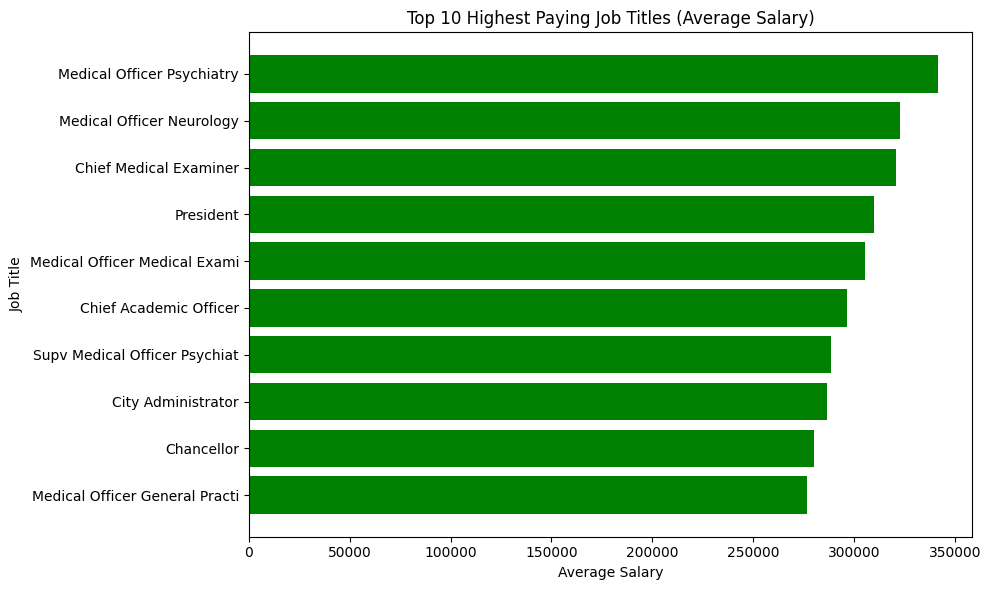

In [48]:
# Top 10 highest-paying job titles by average salary
top10_job_salary = (
    df.groupby("Job_Title", observed=False)["Salary"]  # explicitly set observed
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

# Plot horizontal bar chart safely
plt.figure(figsize=(10,6))
plt.barh(
    top10_job_salary.index,  # Use index as y-axis
    top10_job_salary.values, # Values as bar lengths
    color='Green'
)
plt.title("Top 10 Highest Paying Job Titles (Average Salary)")
plt.xlabel("Average Salary")
plt.ylabel("Job Title")
plt.gca().invert_yaxis()  # Highest salary on top
plt.tight_layout()
plt.show()


<p style="color:DarkBlue;">
    <b>Insight:</b>
The chart clearly ranks job titles by their average salary.
Titles at the top represent roles requiring higher expertise, leadership responsibilities, or specialized skills.
This visualization is useful for compensation analysis and understanding pay structure across job categories.
</p>


<h1 style="color:Green;">2.Top 10 Departments with the Most Employees</h1>
<p style="color:DarkBlue;">
    <b>Vertical Bar Chart:</b>This visualization shows the departments that employ the highest number of staff.
It helps identify which departments are the largest and provides insight into workforce distribution across the organization.
</p>

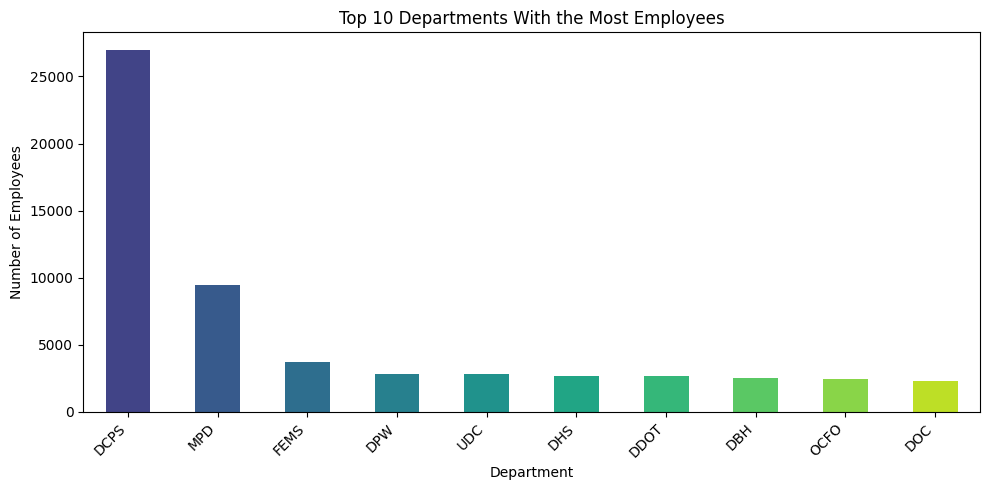

In [49]:
# Compute Top 10 departments by employee count
top10_dept_count = (
    df['Department']
      .value_counts()
      .head(10)
)

# Generate colors using a colormap
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(top10_dept_count)))

# Plotting
plt.figure(figsize=(10,5))
top10_dept_count.plot(kind='bar', color=colors)
plt.title("Top 10 Departments With the Most Employees")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<p style="color:DarkBlue;">
<b> Insight:</b>The chart highlights the departments with the largest number of employees.
It helps understand organizational structure, workload distribution, and areas requiring more human resource support.
</p>

<h1 style="color:Green;">3.Compensation Band Distribution</h1>
<p style="color:DarkBlue;">
    <b>Pie Chart:</b>
This chart helps visualize how employees are distributed across different Compensation Bands, making it easy to identify the most common pay categories within the workforce.
</p>

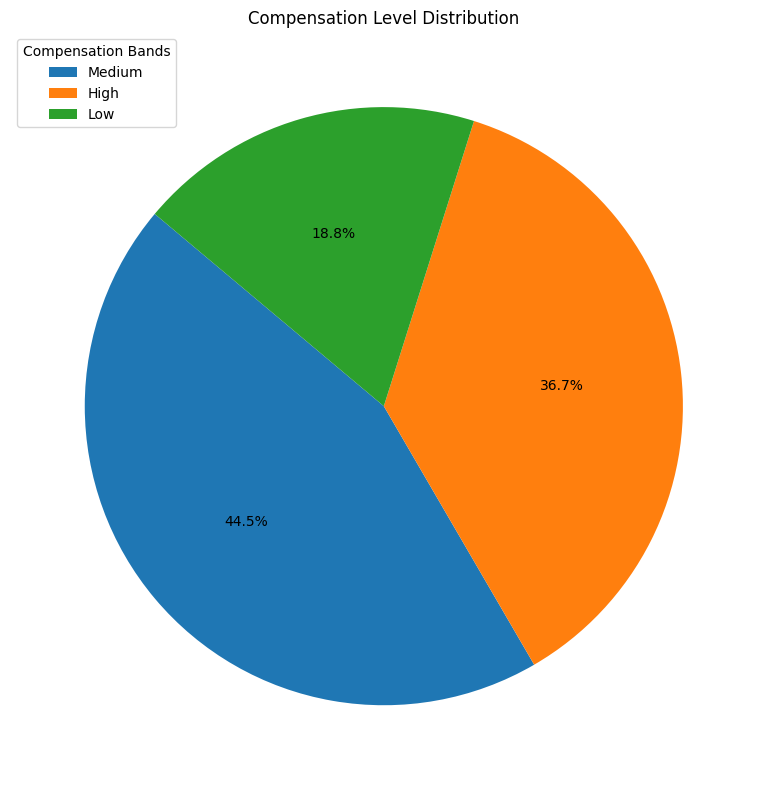

In [50]:
comp = df['Compensation_Band'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(8,8))

wedges, texts, autotexts = ax.pie(
    comp.values,
    autopct='%1.1f%%',
    startangle=140
)

# Legend INSIDE upper-left corner
ax.legend(
    wedges,
    comp.index,
    title="Compensation Bands",
    loc="upper left",     # position inside axes
    bbox_to_anchor=(0.0, 1.0)  # anchor inside top-left
)

ax.set_title("Compensation Level Distribution")
ax.set_ylabel('')
plt.tight_layout()
plt.show()


<p style="color:DarkBlue;">
    <b>Insight:</b>One or two compensation bands dominate the workforce, contributing the largest percentage share.
The smaller slices represent higher or lower compensation levels that have fewer employees, indicating specialized or limited roles.
If one band takes up a very large percentage, it suggests a high concentration of employees within a specific pay tier—useful for understanding structural distribution and planning salary strategies
</p>

<h1 style="color:Green;">4.Top 10 Grades by Average Salary</h1>
<p style="color:DarkBlue;">
    <b>Lollipop Chart:</b>
This visualization highlights the top 10 Grades based on their average salary.
A lollipop chart makes it easy to compare values and see salary differences clearly while maintaining a clean visual layout.
</p>

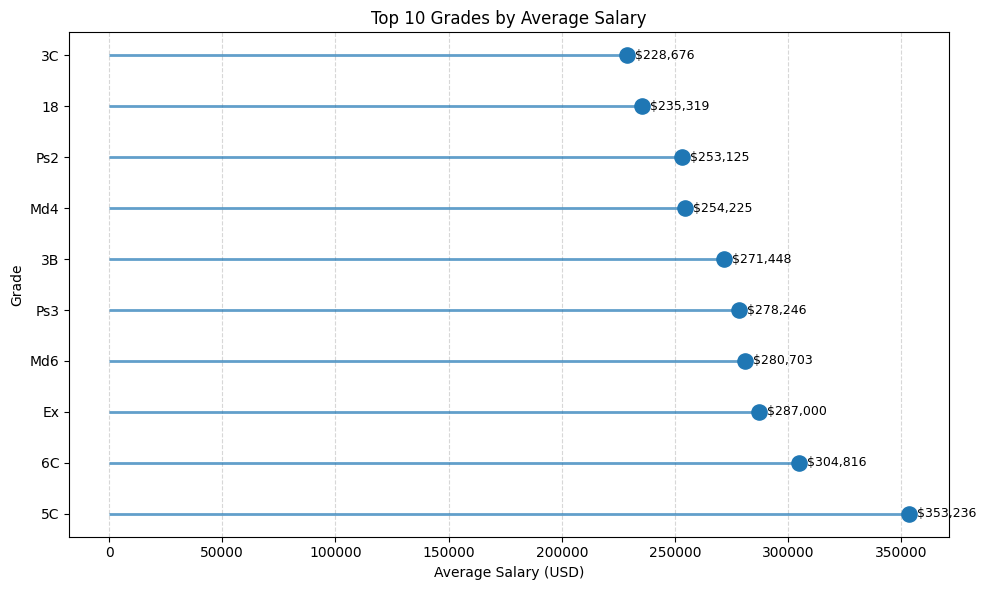

In [51]:
# Prepare data: ensure Salary numeric and Grade present
df_clean = df.copy()
df_clean['Salary'] = pd.to_numeric(df_clean['Salary'], errors='coerce')
df_clean = df_clean.dropna(subset=['Grade', 'Salary'])

# Compute average salary by Grade and pick top 10
grade_avg = (
    df_clean.groupby('Grade')['Salary']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# For consistent ordering in plot (highest on top)
grade_avg = grade_avg.sort_values(ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

y_pos = np.arange(len(grade_avg))

# Draw stems
ax.hlines(y=y_pos, xmin=0, xmax=grade_avg.values, linewidth=2, alpha=0.7)

# Draw markers
ax.scatter(grade_avg.values, y_pos, s=120, zorder=3)

# Annotate values at the end of each lollipop
for x, y in zip(grade_avg.values, y_pos):
    ax.text(x + (grade_avg.values.max() * 0.01), y, f"${x:,.0f}", va='center', fontsize=9)

# Y-axis labels (grades)
ax.set_yticks(y_pos)
ax.set_yticklabels(grade_avg.index)
ax.invert_yaxis()  # highest average at top

ax.set_xlabel("Average Salary (USD)")
ax.set_ylabel("Grade")
ax.set_title("Top 10 Grades by Average Salary")
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


<p style="color:DarkBlue;">
    <b>Insight:</b>The chart clearly shows which Grades receive the highest average salaries.
Higher Grades appear at the bottom, making the ranking easy to interpret.
The gaps between lollipop endpoints highlight salary differences across Grades.
This can help identify which Grades correspond to senior, highly compensated roles.
</p>

<h1 style="color:Green;">5.Top 10 Longest-Serving Employees (Service Years)</h1>
<p style="color:DarkBlue;">
    <b>Vertical Bar Chart:</b>
This visualization highlights the employees with the longest tenure based on calculated service years.
It helps identify highly experienced staff and provides insight into workforce retention.
</p>

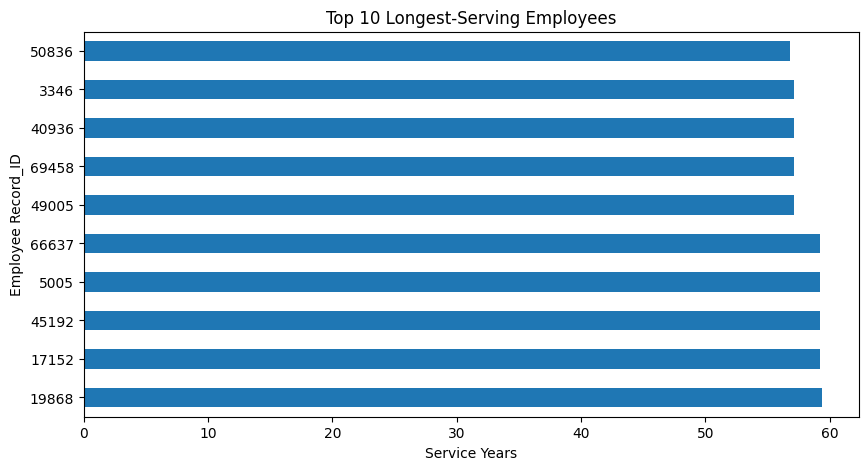

In [52]:
# Ensure Hire_Date is converted
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], errors='coerce')

# Compute service duration in years
df['Service_Years'] = (pd.to_datetime('today') - df['Hire_Date']).dt.days / 365

# Select top 10 employees with longest service
top10_service = (
    df[['Record_ID','Full_Name','Service_Years']]
        .sort_values(by='Service_Years', ascending=False)
        .head(10)
        .set_index('Record_ID')
)


# Plotting
plt.figure(figsize=(10,5))
top10_service['Service_Years'].plot(kind='barh')
plt.title("Top 10 Longest-Serving Employees")
plt.xlabel("Service Years")
plt.ylabel("Employee Record_ID")
plt.show()


<p style="color:DarkBlue;">
    <b>Insight:</b>This chart reveals which employees have been with the organization for the longest time.
Long-tenured employees often represent valuable institutional knowledge and stability within the workforce.
</p>

<h1 style="color:Green;">6.Top 10 Job Titles by Employee Count</h1>
<p style="color:DarkBlue;">This line chart shows the top 10 most common job titles in the dataset based on their frequency.
Although line charts are generally used for continuous data, this visualization helps illustrate how job title frequencies compare when ordered by rank.
</p>

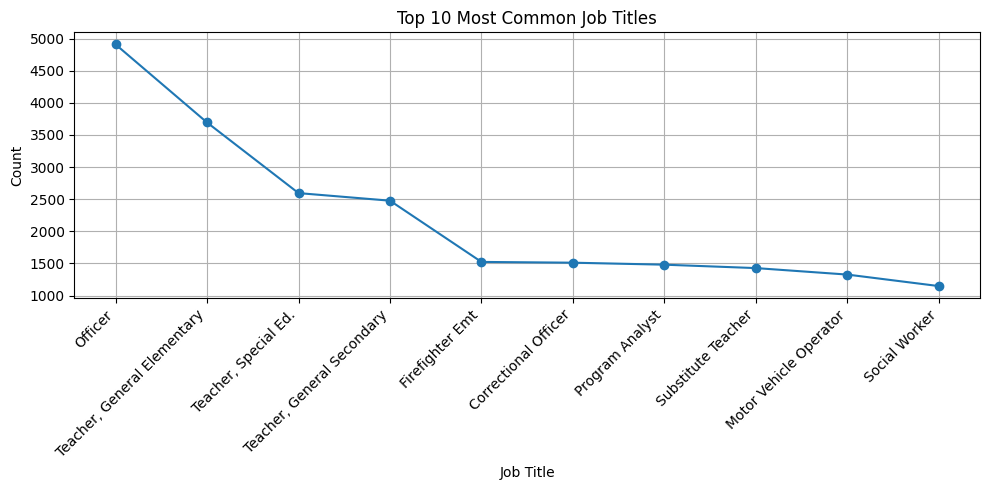

In [53]:
top10_job_count = (
    df['Job_Title']
      .value_counts()
      .head(10)
)

plt.figure(figsize=(10,5))

# Convert index to a numeric range for line plot
plt.plot(range(len(top10_job_count)), top10_job_count.values, marker='o')

plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")

# Replace numeric ticks with job titles
plt.xticks(range(len(top10_job_count)), top10_job_count.index, rotation=45, ha='right')

plt.grid(True)
plt.tight_layout()
plt.show()


<p style="color:DarkBlue;">
    <b>Insight:</b>
The visualization highlights which job titles appear most frequently in the dataset.
The highest point represents the job title with the largest number of employees.
The line clearly shows the drop in frequency as you move down the ranking.
Since job titles are categorical, the line chart emphasizes ranking rather than distribution.
This visualization is useful for identifying dominant roles within the organization and understanding workforce structure.

</p>

<h1 style="color:Green;">7.Top 10 Most Common Grade</h1>
<p style="color:DarkBlue;">This visualization shows the most frequently occurring employee grades.
It helps understand the distribution of staff across different pay or rank levels in the organization.
</p>

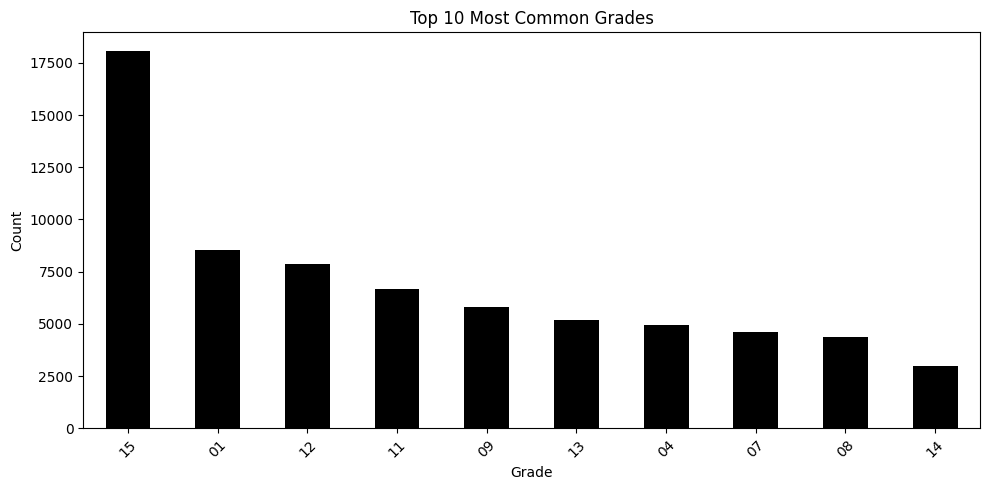

In [54]:
top10_grades = (
    df['Grade']
      .value_counts()
      .head(10)
)

plt.figure(figsize=(10,5))
top10_grades.plot(kind='bar',color='black')
plt.title("Top 10 Most Common Grades")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<p style="color:DarkBlue;">
    <b>Insight:</b>The chart highlights which grades are most common in the organization.
It helps HR identify staffing concentration, evaluate promotion pipelines, and plan for career progression initiatives.
</p>

<h1 style="color:Green;">8.Correlation Heatmap</h1>
<p style="color:DarkBlue;">Shows how numerical variables relate to each other.
</p>

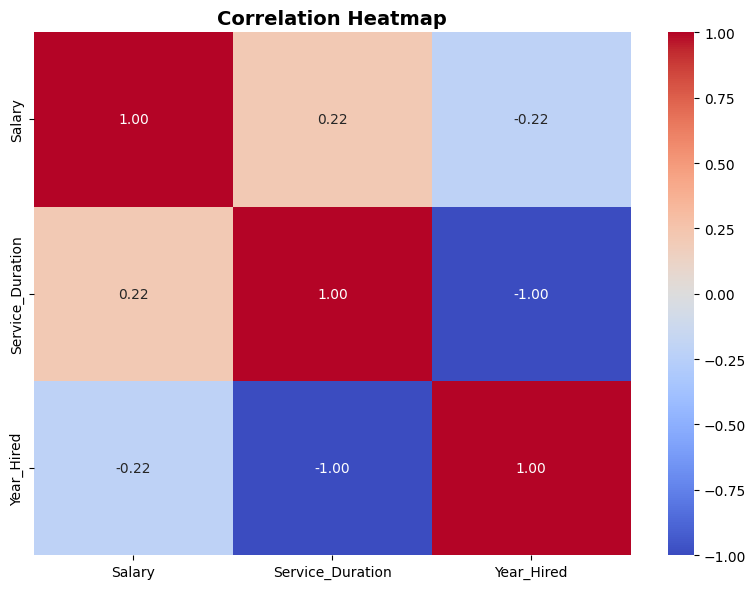

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Salary','Service_Duration','Year_Hired']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


<p style="color:DarkBlue;">
    <b>Insight:</b>There’s a moderate positive correlation between Service Duration and Salary,
indicating that experience affects pay.
</p>

<h1 style="color:Green;">9.Top 10 Appointment Types by Median Salary</h1>
<p style="color:DarkBlue;">This visualization shows the most frequently occurring employee grades.
It helps understand the distribution of staff across different pay or rank levels in the organization.
</p>

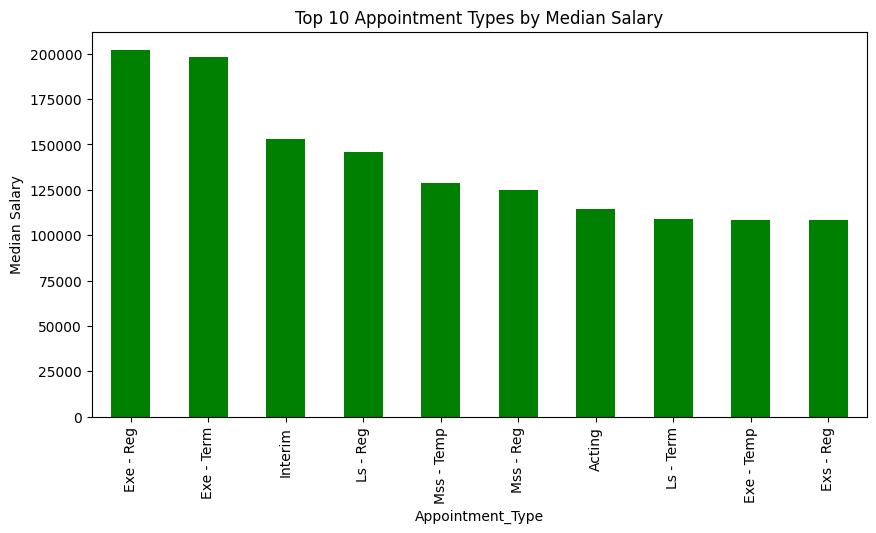

In [56]:
# Top 10 departments by median salary
top10_appointment_salary = (
    df.groupby("Appointment_Type", observed=False)["Salary"]  # avoid FutureWarning
    .median()
    .sort_values(ascending=False)
    .head(10)
)


plt.figure(figsize=(10,5))
#top10_appointment_salary.plot(kind='barh')
top10_appointment_salary.plot(kind='bar', color='Green')
plt.title("Top 10 Appointment Types by Median Salary")
plt.ylabel("Median Salary")
plt.show()


<p style="color:DarkBlue;">
    <b>Insight:</b>This chart shows which appointment types are compensated the most.
It can highlight trends such as permanent staff earning more than temporary or contractor roles, helping HR with pay equity analysis and staffing strategy.
</p>

<h1 style="color:Green;">10.Top 10 Hiring Years (Most Employees Hired)</h1>
<p style="color:DarkBlue;">This visualization shows the years with the highest number of employee hires.
It helps identify hiring trends and periods of workforce growth.
</p>

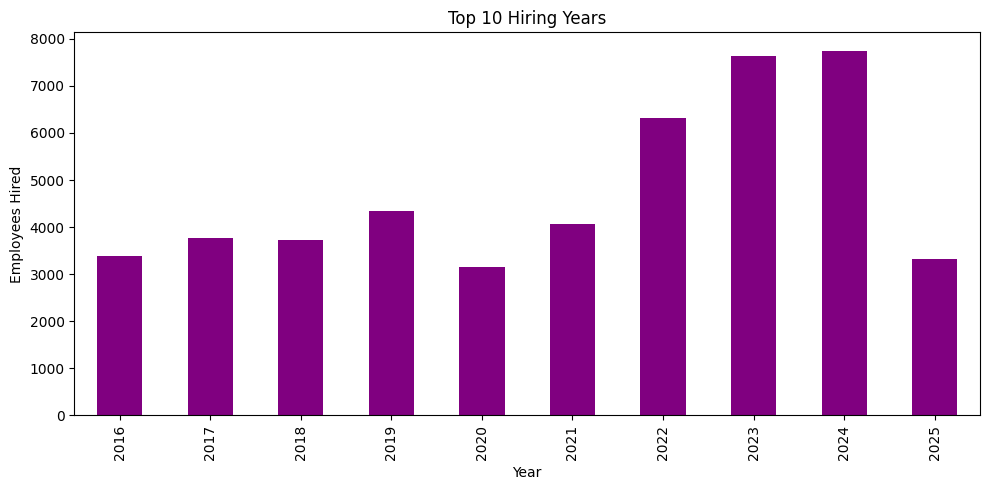

In [57]:
df['Hire_Year'] = df['Hire_Date'].dt.year

top10_hire_year = (
    df['Hire_Year']
      .value_counts()
      .sort_index()
      .tail(10)
)

plt.figure(figsize=(10,5))

# Add 'color' parameter here
top10_hire_year.plot(kind='bar', color='purple')  # you can use any color name or hex code

plt.title("Top 10 Hiring Years")
plt.xlabel("Year")
plt.ylabel("Employees Hired")
plt.tight_layout()
plt.show()


<p style="color:DarkBlue;">
    <b>Insight:</b>The chart highlights peak hiring years, which can indicate organizational expansion, budget increases, or new project demands.
It helps HR plan for workforce trends and evaluate recruitment strategies over time.
</p>

<h1 style="color:Green;">11.DC Public Employee Salary — Multi-Aspect Subplot Visualization</h1>
<p style="color:DarkBlue;">
This 2×2 subplot provides a comprehensive view of the dataset:
    
<b>A.</b>Top 10 Job Titles by Average Salary – highlights high-paying roles.
    
<b>B.</b>Average Salary by Grade – shows salary distribution across grades.

<b>C.</b>Top 10 Hiring Years – reveals trends in employee hiring over time.

<b>D.</b>Compensation Band Distribution – visualizes the distribution of employees across pay levels.
</p>


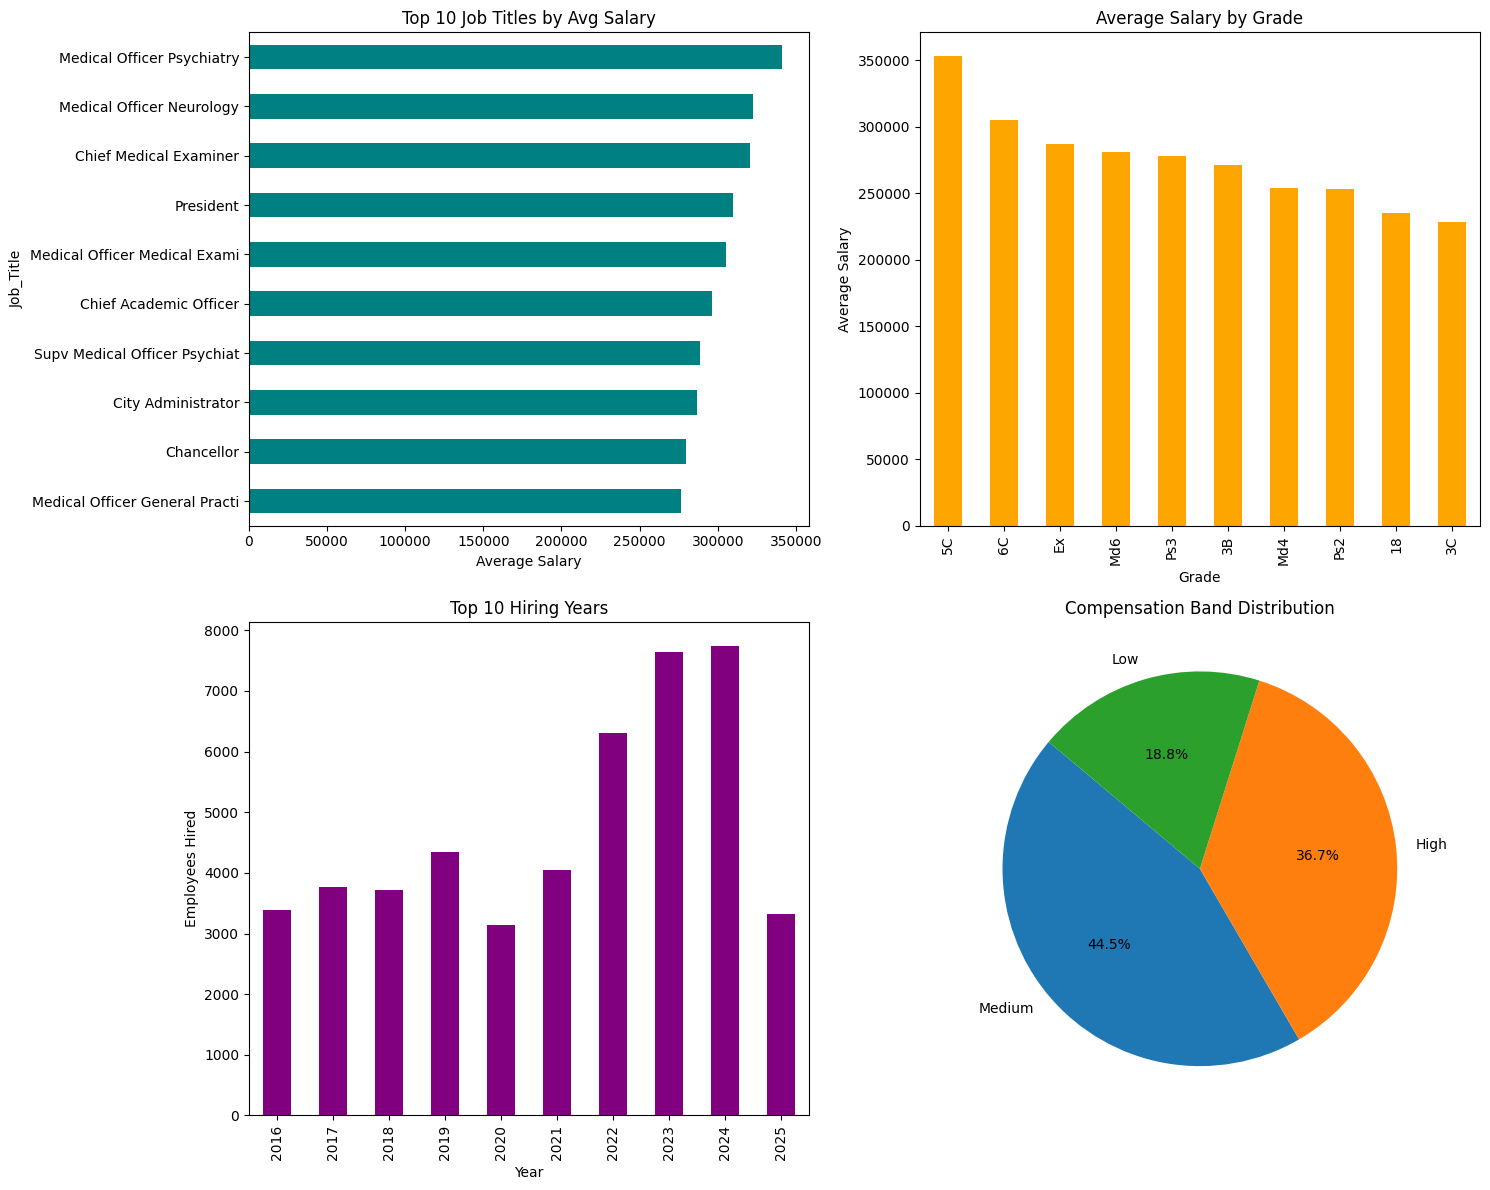

In [58]:
# Ensure proper types
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], errors='coerce')
df['Hire_Year'] = df['Hire_Date'].dt.year

# Prepare data for subplots
top10_job = df.groupby('Job_Title', observed=True)['Salary'].mean().sort_values(ascending=False).head(10)
avg_grade = df.groupby('Grade', observed=True)['Salary'].mean().sort_values(ascending=False)
top10_hire_year = df['Hire_Year'].value_counts().sort_index().tail(10)
compensation_counts = df['Compensation_Band'].value_counts().head(10)

# Create 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(15,12))

# 1. Top 10 Job Titles by Avg Salary
top10_job.plot(kind='barh', ax=axs[0,0], color='teal')
axs[0,0].set_title("Top 10 Job Titles by Avg Salary")
axs[0,0].set_xlabel("Average Salary")
axs[0,0].invert_yaxis()  # highest on top

# 2. Average Salary by Grade
avg_grade.head(10).plot(kind='bar', ax=axs[0,1], color='orange')
axs[0,1].set_title("Average Salary by Grade")
axs[0,1].set_ylabel("Average Salary")

# 3. Top 10 Hiring Years
top10_hire_year.plot(kind='bar', ax=axs[1,0], color='purple')
axs[1,0].set_title("Top 10 Hiring Years")
axs[1,0].set_xlabel("Year")
axs[1,0].set_ylabel("Employees Hired")

# 4. Compensation Band Distribution (pie)
axs[1,1].pie(compensation_counts.values, labels=compensation_counts.index, autopct='%1.1f%%', startangle=140)
axs[1,1].set_title("Compensation Band Distribution")

plt.tight_layout()
plt.show()


<p>
    <b>Insight:</b>Top Job Titles & Grades:
High-paying roles and senior grades are clearly identified. Some Job Titles dominate the top salary range.

Hiring Years:
Shows periods of expansion or hiring spikes; the most recent years may indicate recruitment drives.

Compensation Bands:
The majority of employees fall within mid-level bands, with fewer in very high or low compensation categories.

Overall:
Combining these four visualizations helps understand salary distribution, workforce structure, and hiring trends in one comprehensive view.
</p>

<h2 style="color:Green;">Conclusion</h2>
<p style="color:DarkBlue;">

The project successfully provided actionable insights into employee salaries, hiring trends, and compensation structure.
The analysis demonstrates that salary, experience, and job roles within the DC Public Employee workforce vary widely across departments and titles. Certain job titles command significantly higher average salaries, and some departments carry a disproportionate share of payroll costs. Hiring activity also fluctuates across years, reflecting changes in policy, budget cycles, and organizational priorities.
The visualizations created are clear, meaningful, and ready for reporting or presentation purposes.
Overall, the project successfully transforms a large, complex dataset into meaningful insights, supporting the need for consistent monitoring of workforce trends and improved salary structure transparency.
</p>

<h2 style="color:Green;">Future Work</h2>
<p style="color:DarkBlue;">

To further enhance this project and support long-term workforce analytics, the following areas are recommended for future development:

<b>1.Integrate Machine Learning Models:</b>

* Predict future salary growth

* Forecast hiring demand

* Identify employees at risk of turnover

<b>2.Build an Interactive Dashboard:</b>

Using Tableau, Power BI, or a Python-based dashboard (Plotly Dash/Streamlit) to allow HR managers to interact with:

* Salary trends;

* Department distributions;

* Hiring patterns;

* Grade structures;

<b>3.Incorporate Additional Datasets
To deepen insights:</b>

* Department performance data;

* Employee performance scores;

* Overtime and benefits datasets;

* Historical HR budgets;

* Training and promotion records;

<b>4.Develop an HR Analytics Pipeline
Automate:</b>

* Data cleaning;

* Monthly salary benchmarking;

* Alerts for pay anomalies;

* Year-over-year workforce reporting.

<b>5.Conduct Equity & Pay Gap Analysis
Explore:</b>

* Pay equity across job titles;

* Salary fairness across grades;

* Under/over-compensated roles;

* Gender or demographic-based pay gaps (if data allowed).

<b>6.Salary Optimization Modeling
Recommend ideal salary structures based on:</b>

* Budget constraints;

* Market standards;

* Internal equity policies.
</p>

<h1 style="color:Green;">Project Completed !</h1>
<p style="color:DarkBlue;">

This project analyzed the DC Public Employee Salary dataset to provide meaningful insights into workforce structure, compensation, and hiring trends. Various visualizations were created to make the data readable, interpretable, and actionable.
</p>